# World Data Viz Challenge 2020 - Barcelona
This is the Jupyter Notebook of the project presented in World Data Viz Challange 2020

## Contents
1. Importing Available Datasets
0. Graph Data Visualization
0. Training the model
0. Evaluating the model

## 1. Importing Available Datasets

In this section the datasets used to train the proposed architecture are detailed and loaded into the `dataset` variable.

The type of dataset supported by this architecture has to be of the form of:

| Codi_Districte        | Codi_Barri     | Expected output   |
|-----------------------|----------------|-------------------|
|`int`                  |`int`           |`float`            |

The tested dataset reported in this work are shown below: uncomment the desired dataset for the model training of the specific task.


In [69]:
import datasets

# LLOGUERS DATASET: params (default):
#   - years: list of available years to take the dataset from
#   - lloguer_mensual (False): boolean variable to predict monthly value or m2
#dataset = datasets.LloguersDataset(years=[2019,2018,2017], lloguer_mensual=True)

# ATURS DATASET: params:
#   - years: list of available years to take the dataset from
#   - specific_months ([1, ..., 12]): Months in which the dataset will take values from (e.g. prediction only January: [1])
#dataset = datasets.AtursDataset(years=[2019, 2018])
#dataset = datasets.AtursDataset(years=[2019, 2018], specific_months=[6,7,8])

# ESPERANÇA DE VIDA DATASET: no params:
#dataset = datasets.EspVidaDataset()

# SUPERFÍFICE HABITATGE: params:
#   - years: list of available years to take the dataset from
#dataset = datasets.SuperficieHabitatge(years=[2019, 2018])

# SUPERFICIE DE LLOGUER: params:
#   - years: list of available years to take the dataset from
#dataset = datasets.SuperficieLloguer(years=[2019,2018,2017,2016])

# RENDA TRIBUTARIA: params
#   - years: list of available years to take the dataset from
#dataset = datasets.RendaTributaria(years=[2017])

# EDAT MITJANA: params
#   - years: list of available years to take the dataset from
dataset = datasets.EdatMitjana(years=[2019, 2018])

data_name = dataset.get_title()
print("Dataset Loaded: {0}".format(data_name))

Dataset Loaded: Edad media de la población


## 2. Graph Data Visualization
The input of the proposed architecture are two graphs which encodes the the topological information of the city's districts and neighbrhoods in the form of an adjacency matrix.

Each neighborhood and district has it's own weighted graph in which the connections are stronger if the neighborhood/district are side by side in the city map.

A nice way to view the adjacency matrix is by treating it as an image where each pixel color determines a weight-connexion:
- __Yellow__: The connection between the neighborhood/district and itself (always in the diagonal of the matrix)
- __Green__: The weighted connection between the neighborhood/district and it's adjacent neighborhood/district according to the city distribution
- __Blue__: The real connections between neighborhoods/districts
- __Dark Blue__: No connection between these neighborhoods/districts.

Each district graph is a $10 \times 10$ matrix and the neighborhood graph is a $73 \times 73$ matrix.

To iterate between all possible inputs change the varialbe `dataset_sample` between 1 and 73 (representing all the neighborhood - districts will update according)


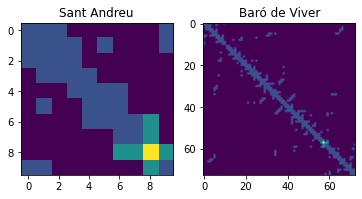

In [70]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datasets

BCN_dataset = datasets.BCNDataset()

# Data sample from 1 to 73
dataset_sample = 58

sample = BCN_dataset[dataset_sample-1]
neighborhood_graph = sample['neighborhood_graph']
district_graph = sample['district_graph']

f, axarr = plt.subplots(1,2) 
axarr[0].imshow(district_graph)
axarr[0].title.set_text(sample['district_name'])
axarr[1].imshow(neighborhood_graph)
axarr[1].title.set_text(sample['neighborhood_name'])

## 3. Training the model
The training of the Graph Neural Network is done through the `train_model` method. This function returns the trained model as well as the loss values at each epoch of the iteration (both from training and validation).

The method requires to sepcify the training dataset, number of epochs, batch size and the learning rate.

In our implementation, the hyper parameter choice (which can be fine tunded in `train.py`) follows:
- __Optimizer__: ADAM
- __Loss function__: Mean Squared Error MSE
- __Learning rate__: 0.0005
- __Split dataset__: 70% train, 30% Validation


In [71]:
from train import train_model

# Function to train the model, returns the model and loss values
model, loss_train, loss_val = train_model(dataset, num_epochs=200, batch_size=300, lr=0.0005)

Epoch [  0/200] 	 Training Loss: 18201.2808 	 Validation Loss: 3351.7996
Epoch [ 10/200] 	 Training Loss: 1323.3083 	 Validation Loss: 244.0895
Epoch [ 20/200] 	 Training Loss: 685.1430 	 Validation Loss: 137.2384
Epoch [ 30/200] 	 Training Loss: 616.2192 	 Validation Loss: 123.8301
Epoch [ 40/200] 	 Training Loss: 596.9357 	 Validation Loss: 122.1129
Epoch [ 50/200] 	 Training Loss: 602.6327 	 Validation Loss: 120.7566
Epoch [ 60/200] 	 Training Loss: 560.7291 	 Validation Loss: 122.1029
Epoch [ 70/200] 	 Training Loss: 545.2387 	 Validation Loss: 120.9777
Epoch [ 80/200] 	 Training Loss: 567.8976 	 Validation Loss: 123.2734
Epoch [ 90/200] 	 Training Loss: 535.1019 	 Validation Loss: 118.5938
Epoch [100/200] 	 Training Loss: 531.5727 	 Validation Loss: 118.6639
Epoch [110/200] 	 Training Loss: 535.7739 	 Validation Loss: 117.5150
Epoch [120/200] 	 Training Loss: 532.8477 	 Validation Loss: 119.6600
Epoch [130/200] 	 Training Loss: 525.0009 	 Validation Loss: 118.1798
Epoch [140/200] 

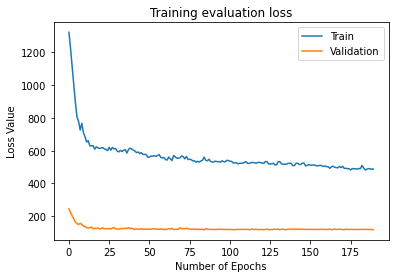

In [72]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Visualization of the loss value evolution (discarding the firts epochs - random init)
plt.plot(loss_train[10:], label="Train")
plt.plot(loss_val[10:], label="Validation")

plt.xlabel("Number of Epochs")
plt.ylabel("Loss Value")
plt.legend(loc="upper right")
plt.title("Training evaluation loss")

# Save the figure
plt.savefig("output/loss_.png")

plt.show()

## 4. Evaluate the model
The function `evaluate_model` generates a new dataset where there are as many entries as neighborhoods. It generates both the district and neighborhood graph and evaluates each entry.

Results are shown in form of a print table and a temperature map

In [73]:
from train import evaluate_model

evaluations = evaluate_model(model)
predictions = []

for evaluation in evaluations:
    print("Districte: {0:<25s}Barri: {1:<50s}{2:>20s}: {3:.2f}".format(
    evaluation['district_name'],
    evaluation['neighborhood_name'],
    data_name,
    evaluation['prediction']) )

    predictions.append(evaluation['prediction'])

Districte: Ciutat Vella             Barri: el Raval                                          Edad media de la población: 82.69
Districte: Ciutat Vella             Barri: el Barri Gòtic                                    Edad media de la población: 82.68
Districte: Ciutat Vella             Barri: la Barceloneta                                    Edad media de la población: 77.26
Districte: Ciutat Vella             Barri: Sant Pere, Santa Caterina i la Ribera             Edad media de la población: 82.75
Districte: Eixample                 Barri: el Fort Pienc                                     Edad media de la población: 61.95
Districte: Eixample                 Barri: la Sagrada Família                                Edad media de la población: 62.35
Districte: Eixample                 Barri: la Dreta de l'Eixample                            Edad media de la población: 73.98
Districte: Eixample                 Barri: l'Antiga Esquerra de l'Eixample                   Edad media de la p

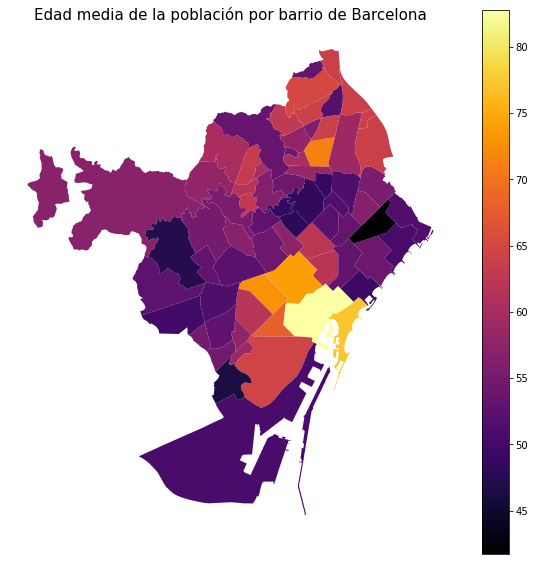

In [74]:
import geopandas as gpd
m = "barris.geojson"

# Load the district map GEOJSON and add the column predicition
map_data = gpd.read_file("bcn_map/barris.geojson")
map_data['PRED'] = predictions

# Control del tamaño de la figura del mapa
fig, ax = plt.subplots(figsize=(10, 10))
 
# Control del título y los ejesa< 
 e   
ax.set_title(data_name + " por barrio de Barcelona", fontdict={'fontsize': 15})
#ax.set_xlabel('Longitud')
#ax.set_ylabel('Latitud')
plt.axis('off')

# Mostrar el mapa finalizado
map_data.plot(column='PRED', cmap='inferno', ax=ax, zorder=10, legend=True)

plt.savefig("output/heatmap_.png")
